In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [6]:
# import pro-football-reference fantasy data
data2020 = pd.read_csv("Data/data2020.txt")
data2019 = pd.read_csv("Data/data2019.txt")
data2018 = pd.read_csv("Data/data2018.txt")
data2017 = pd.read_csv("Data/data2017.txt")
data2016 = pd.read_csv("Data/data2016.txt")
data2015 = pd.read_csv("Data/data2015.txt")
data2014 = pd.read_csv("Data/data2014.txt")
data2013 = pd.read_csv("Data/data2013.txt")
data2012 = pd.read_csv("Data/data2012.txt")
data2011 = pd.read_csv("Data/data2011.txt")
data2010 = pd.read_csv("Data/data2010.txt")

In [7]:
# fill NaNs, add season columns, drop player IDs from "Player" column
data2020 = data2020.fillna(0)
data2020["Season"] = 2020
data2020["Player"] = data2020["Player"].str.split("*",n=1,expand=True)[0]
data2020["Player"] = data2020["Player"].str.split("\\",n=1,expand=True)[0]

data2019 = data2019.fillna(0)
data2019["Season"] = 2019
data2019["Player"] = data2019["Player"].str.split("*",n=1,expand=True)[0]
data2019["Player"] = data2019["Player"].str.split("\\",n=1,expand=True)[0]

data2018 = data2018.fillna(0)
data2018["Season"] = 2018
data2018["Player"] = data2018["Player"].str.split("*",n=1,expand=True)[0]
data2018["Player"] = data2018["Player"].str.split("\\",n=1,expand=True)[0]

data2017 = data2017.fillna(0)
data2017["Season"] = 2017
data2017["Player"] = data2017["Player"].str.split("*",n=1,expand=True)[0]
data2017["Player"] = data2017["Player"].str.split("\\",n=1,expand=True)[0]

data2016 = data2016.fillna(0)
data2016["Season"] = 2016
data2016["Player"] = data2016["Player"].str.split("*",n=1,expand=True)[0]
data2016["Player"] = data2016["Player"].str.split("\\",n=1,expand=True)[0]

data2015 = data2015.fillna(0)
data2015["Season"] = 2015
data2015["Player"] = data2015["Player"].str.split("*",n=1,expand=True)[0]
data2015["Player"] = data2015["Player"].str.split("\\",n=1,expand=True)[0]

data2014 = data2014.fillna(0)
data2014["Season"] = 2014
data2014["Player"] = data2014["Player"].str.split("*",n=1,expand=True)[0]
data2014["Player"] = data2014["Player"].str.split("\\",n=1,expand=True)[0]

data2013 = data2013.fillna(0)
data2013["Season"] = 2013
data2013["Player"] = data2013["Player"].str.split("*",n=1,expand=True)[0]
data2013["Player"] = data2013["Player"].str.split("\\",n=1,expand=True)[0]

data2012 = data2012.fillna(0)
data2012["Season"] = 2012
data2012["Player"] = data2012["Player"].str.split("*",n=1,expand=True)[0]
data2012["Player"] = data2012["Player"].str.split("\\",n=1,expand=True)[0]

data2011 = data2011.fillna(0)
data2011["Season"] = 2011
data2011["Player"] = data2011["Player"].str.split("*",n=1,expand=True)[0]
data2011["Player"] = data2011["Player"].str.split("\\",n=1,expand=True)[0]

data2010 = data2010.fillna(0)
data2010["Season"] = 2010
data2010["Player"] = data2010["Player"].str.split("*",n=1,expand=True)[0]
data2010["Player"] = data2010["Player"].str.split("\\",n=1,expand=True)[0]
data2010

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Arian Foster,HOU,RB,24,16,13,0.0,0.0,0.0,...,0.0,0.0,326.0,392.0,400.0,359.0,190.0,1,1.0,2010
1,2,Adrian Peterson,MIN,RB,25,15,15,0.0,0.0,0.0,...,0.0,0.0,240.0,275.9,282.9,257.9,104.0,2,2.0,2010
2,3,Jamaal Charles,KAN,RB,24,16,6,0.0,0.0,0.0,...,0.0,0.0,238.0,282.5,290.5,260.0,102.0,3,3.0,2010
3,4,Peyton Hillis,CLE,RB,24,16,14,1.0,2.0,13.0,...,0.0,0.0,234.0,294.9,305.9,264.4,98.0,4,4.0,2010
4,5,Chris Johnson,TEN,RB,25,16,16,0.0,0.0,0.0,...,0.0,0.0,229.0,272.9,280.9,250.9,93.0,5,5.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,557,Devin Moore,IND,RB,25,4,0,0.0,0.0,0.0,...,0.0,0.0,-2.0,-2.2,-1.2,-2.2,0.0,165,0.0,2010
557,558,Kenny Moore,IND,0,25,2,0,0.0,0.0,0.0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,194,0.0,2010
558,559,Courtney Roby,NOR,0,27,13,0,0.0,0.0,0.0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,195,0.0,2010
559,560,Brian Brohm,BUF,QB,25,1,1,10.0,23.0,106.0,...,0.0,0.0,-4.0,-3.8,0.2,-0.8,0.0,79,0.0,2010


In [13]:
# merge the 3 dataframes
data1 = pd.merge(data2020, data2019, how="outer")
data2 = pd.merge(data1, data2018, how="outer")
data3 = pd.merge(data2, data2017, how="outer")
data4 = pd.merge(data3, data2016, how="outer")
data5 = pd.merge(data4, data2015, how="outer")
data6 = pd.merge(data5, data2014, how="outer")
data7 = pd.merge(data6, data2013, how="outer")
data8 = pd.merge(data7, data2012, how="outer")
data9 = pd.merge(data8, data2011, how="outer")
data = pd.merge(data9, data2010, how="outer")
data

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Derrick Henry,TEN,RB,26,16,16,0,0,0,...,1.0,0.0,314.0,333.1,341.1,323.6,184.0,1,1.0,2020
1,2,Alvin Kamara,NOR,RB,25,15,10,0,0,0,...,0.0,0.0,295.0,377.8,383.8,336.3,165.0,2,2.0,2020
2,3,Dalvin Cook,MIN,RB,25,14,14,0,0,0,...,3.0,0.0,294.0,337.8,346.8,315.8,164.0,3,3.0,2020
3,4,Davante Adams,GNB,WR,28,14,14,0,0,0,...,0.0,0.0,243.0,358.4,362.4,300.9,117.0,1,4.0,2020
4,5,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,1.0,0.0,208.0,312.8,316.8,260.3,117.0,1,5.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,557,Devin Moore,IND,RB,25,4,0,0,0,0,...,0.0,0.0,-2.0,-2.2,-1.2,-2.2,0.0,165,0.0,2010
6758,558,Kenny Moore,IND,0,25,2,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,194,0.0,2010
6759,559,Courtney Roby,NOR,0,27,13,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,195,0.0,2010
6760,560,Brian Brohm,BUF,QB,25,1,1,10,23,106,...,0.0,0.0,-4.0,-3.8,0.2,-0.8,0.0,79,0.0,2010


In [9]:
# # groupby positions *not too useful*
# pos_df = data2020.groupby("FantPos")

# pos_players = pos_df["Player"].nunique()
# pos_players

In [18]:
# Create dataframes of main positions
qb = data.loc[data["FantPos"] == "QB"]
# qb20 = data2020.loc[data2020["FantPos"] == "QB",]
# qb19 = data2019.loc[data2019["FantPos"] == "QB",]
# qb18 = data2018.loc[data2018["FantPos"] == "QB",]

rb = data.loc[data["FantPos"] == "RB"]
# rb20 = data2020.loc[data2020["FantPos"] == "RB",]
# rb19 = data2019.loc[data2019["FantPos"] == "RB",]
# rb18 = data2018.loc[data2018["FantPos"] == "RB",]

wr = data.loc[data["FantPos"] == "WR"]
# wr20 = data2020.loc[data2020["FantPos"] == "WR",]
# wr19 = data2019.loc[data2019["FantPos"] == "WR",]
# wr18 = data2018.loc[data2018["FantPos"] == "WR",]

te = data.loc[data["FantPos"] == "TE"]
# te20 = data2020.loc[data2020["FantPos"] == "TE",]
# te19 = data2019.loc[data2019["FantPos"] == "TE",]
# te18 = data2018.loc[data2018["FantPos"] == "TE",]
te

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
4,5,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,1.0,0.0,208.0,312.8,316.8,260.3,117.0,1,5.0,2020
13,14,Darren Waller,LVR,TE,28,16,15,0,0,0,...,1.0,0.0,172.0,278.6,283.6,225.1,81.0,2,14.0,2020
38,39,Robert Tonyan,GNB,TE,26,16,8,0,0,0,...,0.0,0.0,125.0,176.6,179.6,150.6,34.0,3,39.0,2020
45,46,Mark Andrews,BAL,TE,25,14,2,0,0,0,...,0.0,0.0,112.0,170.1,173.1,141.1,22.0,4,46.0,2020
51,52,T.J. Hockenson,DET,TE,23,16,16,0,0,0,...,1.0,0.0,108.0,175.3,179.3,141.8,18.0,5,52.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,480,Shawn Nelson,BUF,TE,25,5,1,0,0,0,...,0.0,0.0,1.0,3.5,4.5,2.0,0.0,98,0.0,2010
6685,485,Richard Quinn,DEN,TE,24,14,4,0,0,0,...,0.0,0.0,1.0,1.9,1.9,1.4,0.0,94,0.0,2010
6687,487,Alex Smith,CLE,TE,28,3,1,0,0,0,...,0.0,0.0,1.0,1.6,1.6,1.1,0.0,97,0.0,2010
6706,506,Jeff Cumberland,NYJ,TE,23,1,0,0,0,0,...,0.0,0.0,0.0,1.3,1.3,0.8,0.0,99,0.0,2010


In [11]:
qb20.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt', 'Rec', 'Yds.2',
       'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP', 'FantPt', 'PPR',
       'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'Season'],
      dtype='object')

In [30]:
# new column to show position value for QBs#

bins = [0, 12.9, 24.9, 36.9, 48.9, 400]
group_names = ["QB1", "QB2", "QB3", "QB4", "Waiver"]
qb["Value"] = pd.cut(qb["PosRank"], bins, labels=group_names, include_lowest=True)
qb

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season,Value
6,7,Josh Allen,BUF,QB,24,16,16,396,572,4544,...,0.0,395.0,396.1,418.1,405.6,113.0,1,7.0,2020,QB1
7,8,Aaron Rodgers,GNB,QB,37,16,16,372,526,4299,...,0.0,382.0,383.3,396.3,387.8,100.0,2,8.0,2020,QB1
8,9,Kyler Murray,ARI,QB,23,16,16,375,558,3971,...,0.0,379.0,378.7,400.7,390.7,96.0,3,9.0,2020,QB1
9,10,Patrick Mahomes,KAN,QB,25,15,15,390,588,4740,...,3.0,374.0,374.4,388.4,380.4,92.0,4,10.0,2020,QB1
10,11,Deshaun Watson,HOU,QB,25,16,16,382,544,4823,...,1.0,369.0,369.3,385.3,376.3,87.0,5,11.0,2020,QB1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6742,542,Rusty Smith,TEN,QB,23,2,1,20,40,200,...,0.0,0.0,0.0,4.0,4.0,0.0,73,0.0,2010,Waiver
6747,547,Billy Volek,SDG,QB,34,3,0,1,1,8,...,0.0,0.0,-0.2,-0.2,-0.2,0.0,75,0.0,2010,Waiver
6756,556,Levi Brown,BUF,QB,23,1,0,2,3,24,...,0.0,-1.0,-1.0,0.0,0.0,0.0,78,0.0,2010,Waiver
6760,560,Brian Brohm,BUF,QB,25,1,1,10,23,106,...,0.0,-4.0,-3.8,0.2,-0.8,0.0,79,0.0,2010,Waiver


In [31]:
# RB value

bins = [0, 12.9, 24.9, 36.9, 48.9, 400]
group_names = ["RB1", "RB2", "RB3", "RB4", "Waiver"]
rb["Value"] = pd.cut(rb["PosRank"], bins, labels=group_names, include_lowest=True)
rb

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season,Value
0,1,Derrick Henry,TEN,RB,26,16,16,0,0,0,...,0.0,314.0,333.1,341.1,323.6,184.0,1,1.0,2020,RB1
1,2,Alvin Kamara,NOR,RB,25,15,10,0,0,0,...,0.0,295.0,377.8,383.8,336.3,165.0,2,2.0,2020,RB1
2,3,Dalvin Cook,MIN,RB,25,14,14,0,0,0,...,0.0,294.0,337.8,346.8,315.8,164.0,3,3.0,2020,RB1
11,12,Jonathan Taylor,IND,RB,21,15,13,0,0,0,...,0.0,217.0,252.8,259.8,234.8,87.0,4,12.0,2020,RB1
12,13,Aaron Jones,GNB,RB,26,14,14,0,0,0,...,0.0,212.0,258.9,264.9,235.4,82.0,5,13.0,2020,RB1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,512,Lex Hilliard,MIA,RB,26,16,0,0,0,0,...,0.0,0.0,1.3,1.3,0.8,0.0,146,0.0,2010,Waiver
6719,519,Larry Johnson,WAS,RB,31,2,0,0,0,0,...,0.0,0.0,0.2,0.2,0.2,0.0,148,0.0,2010,Waiver
6740,540,Antone Smith,ATL,RB,25,9,0,0,0,0,...,0.0,0.0,-0.3,-0.3,-0.3,0.0,164,0.0,2010,Waiver
6749,549,Leonard Weaver,PHI,RB,28,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,157,0.0,2010,Waiver


In [32]:
# WR value

bins = [0, 12.9, 24.9, 36.9, 48.9, 400]
group_names = ["WR1", "WR2", "WR3", "WR4", "Waiver"]
wr["Value"] = pd.cut(wr["PosRank"], bins, labels=group_names, include_lowest=True)
wr

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season,Value
3,4,Davante Adams,GNB,WR,28,14,14,0,0,0,...,0.0,243.0,358.4,362.4,300.9,117.0,1,4.0,2020,WR1
5,6,Tyreek Hill,KAN,WR,26,15,15,0,0,0,...,0.0,242.0,328.9,334.9,285.4,116.0,2,6.0,2020,WR1
16,17,Stefon Diggs,BUF,WR,27,16,15,0,0,0,...,0.0,202.0,328.6,331.6,265.1,76.0,3,17.0,2020,WR1
19,20,Calvin Ridley,ATL,WR,26,15,15,0,0,0,...,0.0,192.0,281.5,285.5,236.5,66.0,4,20.0,2020,WR1
20,21,D.K. Metcalf,SEA,WR,23,16,16,0,0,0,...,0.0,188.0,271.3,275.3,229.8,62.0,5,21.0,2020,WR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6688,488,Kyle Williams,SFO,WR,22,5,0,0,0,0,...,0.0,1.0,1.8,1.8,1.3,0.0,167,0.0,2010,Waiver
6693,493,Gary Banks,SDG,WR,29,2,2,0,0,0,...,0.0,0.0,1.2,1.2,0.7,0.0,176,0.0,2010,Waiver
6699,499,Duke Calhoun,NYG,WR,23,9,0,0,0,0,...,0.0,0.0,1.4,1.4,0.9,0.0,173,0.0,2010,Waiver
6750,550,Ernest Wilford,JAX,WR,31,2,0,0,0,0,...,0.0,0.0,1.3,1.3,0.8,0.0,175,0.0,2010,Waiver


In [33]:
# TE value

bins = [0, 12.9, 24.9, 36.9, 48.9, 400]
group_names = ["TE1", "TE2", "TE3", "TE4", "Waiver"]
te["Value"] = pd.cut(te["PosRank"], bins, labels=group_names, include_lowest=True)
te

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season,Value
4,5,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,0.0,208.0,312.8,316.8,260.3,117.0,1,5.0,2020,TE1
13,14,Darren Waller,LVR,TE,28,16,15,0,0,0,...,0.0,172.0,278.6,283.6,225.1,81.0,2,14.0,2020,TE1
38,39,Robert Tonyan,GNB,TE,26,16,8,0,0,0,...,0.0,125.0,176.6,179.6,150.6,34.0,3,39.0,2020,TE1
45,46,Mark Andrews,BAL,TE,25,14,2,0,0,0,...,0.0,112.0,170.1,173.1,141.1,22.0,4,46.0,2020,TE1
51,52,T.J. Hockenson,DET,TE,23,16,16,0,0,0,...,0.0,108.0,175.3,179.3,141.8,18.0,5,52.0,2020,TE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,480,Shawn Nelson,BUF,TE,25,5,1,0,0,0,...,0.0,1.0,3.5,4.5,2.0,0.0,98,0.0,2010,Waiver
6685,485,Richard Quinn,DEN,TE,24,14,4,0,0,0,...,0.0,1.0,1.9,1.9,1.4,0.0,94,0.0,2010,Waiver
6687,487,Alex Smith,CLE,TE,28,3,1,0,0,0,...,0.0,1.0,1.6,1.6,1.1,0.0,97,0.0,2010,Waiver
6706,506,Jeff Cumberland,NYJ,TE,23,1,0,0,0,0,...,0.0,0.0,1.3,1.3,0.8,0.0,99,0.0,2010,Waiver


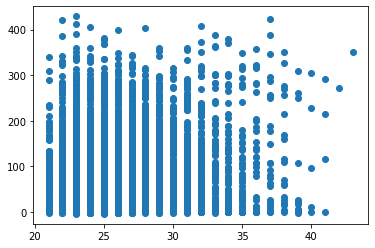

In [35]:
# plotting Age vs Fanduel points for ALL data and positions -- not much to take away because the quarterbacks
plt.scatter(data["Age"], data["FDPt"])
plt.show()

R-squared 0.08437782288188202


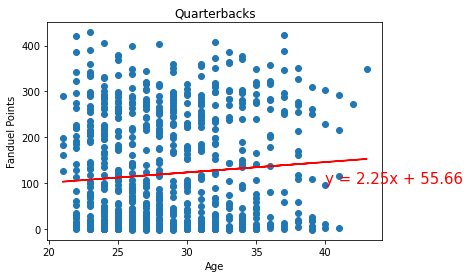

In [36]:
# QB age vs Fanduel points with regression
x = qb["Age"]
y = qb["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Quarterbacks")
print(f"R-squared {rvalue}")
plt.show()

R-squared -0.03388178511622139


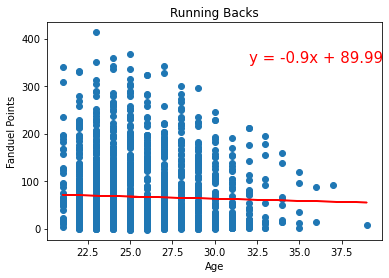

In [37]:
# RB age vs Fanduel points with regression
x = rb["Age"]
y = rb["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(32,350),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Running Backs")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.12714188631998347


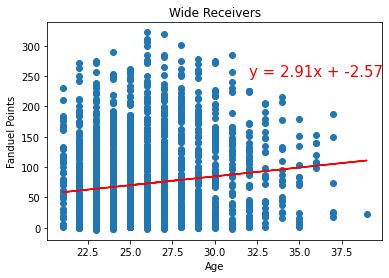

In [38]:
# WR age vs Fanduel points with regression
x = wr["Age"]
y = wr["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(32,250),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Wide Receivers")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.18347733601495372


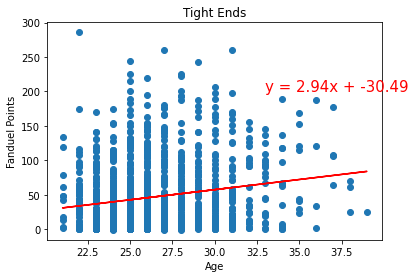

In [39]:
# RB age vs Fanduel points with regression
x = te["Age"]
y = te["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(33,200),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Tight Ends")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.9742353119050187


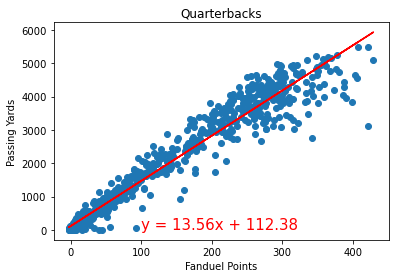

In [40]:
# QB age vs Fanduel points with regression
x = qb["FDPt"]
y = qb["Yds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(100,15),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Passing Yards")
plt.title("Quarterbacks")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.6036958455221701


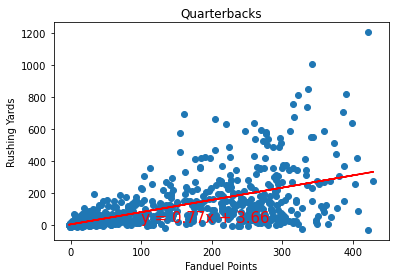

In [41]:
# QB Rush Yards vs Fanduel points with regression
x = qb["FDPt"]
y = qb["Yds.1"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(100,15),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Rushing Yards")
plt.title("Quarterbacks")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.8249436656008188


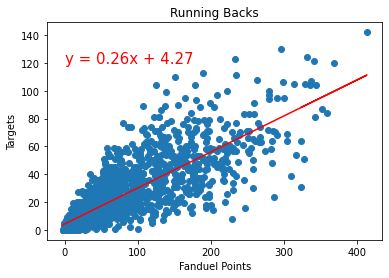

In [45]:
# RB targets vs Fanduel points with regression
x = rb["FDPt"]
y = rb["Tgt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,120),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Targets")
plt.title("Running Backs")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.9240717819270646


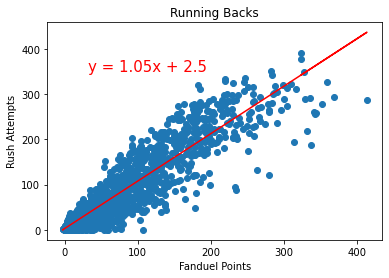

In [44]:
# RB rush attempts vs Fanduel points with regression
x = rb["FDPt"]
y = rb["Att.1"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(32,350),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Rush Attempts")
plt.title("Running Backs")
print(f"R-squared {rvalue}")
plt.show()

In [46]:
# create new CSVs out of 'data' dataframe
data.to_csv("Data/fantasy.csv", index=False, header=True)
qb.to_csv("Data/qb.csv", index=False, header=True)
rb.to_csv("Data/rb.csv", index=False, header=True)
wr.to_csv("Data/wr.csv", index=False, header=True)
te.to_csv("Data/te.csv", index=False, header=True)